# Simulación aleatoria con Numpy

In [1]:
import numpy as np

In [2]:
# Usando el módulo random
die_roll = np.random.randint(1,7)
assert 1 <= die_roll <= 6


In [12]:
# Para guardar los valores de la simulación
np.random.seed(0)
die_rolls = [np.random.randint(1,7) for _ in range(3)]
assert die_rolls == [5,6,1]

print(die_rolls)

[5, 6, 1]


[3, 1, 2, 4, 1, 1, 1, 6, 6, 4, 3, 4, 2, 2, 3, 6, 1, 5, 5, 6, 1, 3, 2, 3, 3, 3, 5, 2, 4, 3, 6, 1, 2, 6, 3, 1, 4, 1, 4, 2, 4, 1, 6, 5, 2, 6, 5, 5, 1, 1, 2, 3, 5, 6, 1, 1, 6, 6, 2, 2, 2, 6, 6, 3, 4, 5, 5, 4, 4, 1, 1, 1, 1, 3, 3, 4, 1, 6, 6, 1, 6, 2, 5, 2, 5, 3, 3, 5, 5, 3, 1, 5, 1, 4, 3, 1, 5, 4, 2, 6]


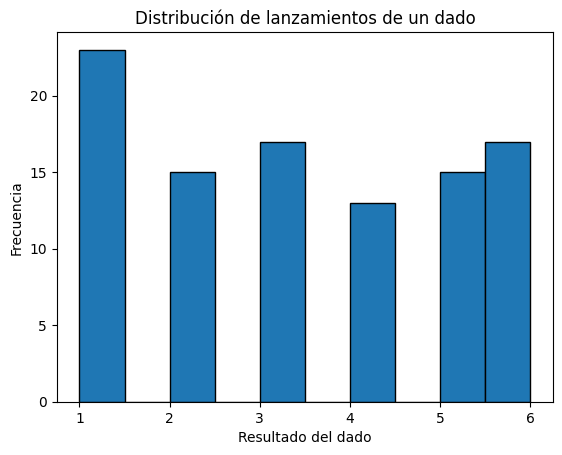

In [24]:
# Simular el lanzamiento de un dado 50 veces
np.random.seed(3)
die_result = [np.random.randint(1,7) for _ in range(100)]
print(die_result)

import matplotlib.pyplot as plt
# Graficar el histograma correctamente
plt.hist(die_result, edgecolor='black')  # Corrección: usar plt.hist() y definir 6 bins
plt.xlabel('Resultado del dado')
plt.ylabel('Frecuencia')
plt.title('Distribución de lanzamientos de un dado')
plt.show()

In [25]:
# Simulación de cara o sello
np.random.seed(0)
coin_flip = np.random.randint(0,2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


In [26]:
# Simulemos 10 lanzamientos de moneda
np.random.seed(0)
def frequency_heads(coin_flip_sequence):
    total_heads = len([head for head in coin_flip_sequence if head == 1])
    return total_heads / len(coin_flip_sequence)

coin_flip = [np.random.randint(0, 2) for _ in range(10)]
frequency_heads = frequency_heads(coin_flip)
print(f"Frequency of Heads is {frequency_heads}")

Frequency of Heads is 0.8
